<a href="https://colab.research.google.com/github/Mo0nro2e/DNN_stock_forcast/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow
!pip install -q kaggle

In [2]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/Mo0nro2e/DNN_stock_forcast/master/bgr.us.txt \
    -O /tmp/bgr.txt

!wget --no-check-certificate \
     https://raw.githubusercontent.com/Mo0nro2e/DNN_stock_forcast/master/jci.us.txt \
    -O /tmp/jci.txt

!wget --no-check-certificate \
  https://raw.githubusercontent.com/Mo0nro2e/DNN_stock_forcast/master/prk.us.txt \
  -O /tmp/prk.txt


--2020-08-25 09:07:36--  https://raw.githubusercontent.com/Mo0nro2e/DNN_stock_forcast/master/bgr.us.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154740 (151K) [text/plain]
Saving to: ‘/tmp/bgr.txt’

/tmp/bgr.txt        100%[===================>] 151.11K  --.-KB/s    in 0.08s   

2020-08-25 09:07:37 (1.76 MB/s) - ‘/tmp/bgr.txt’ saved [154740/154740]

--2020-08-25 09:07:37--  https://raw.githubusercontent.com/Mo0nro2e/DNN_stock_forcast/master/jci.us.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 373164 (364K) [text/plain]
Saving t

In [3]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

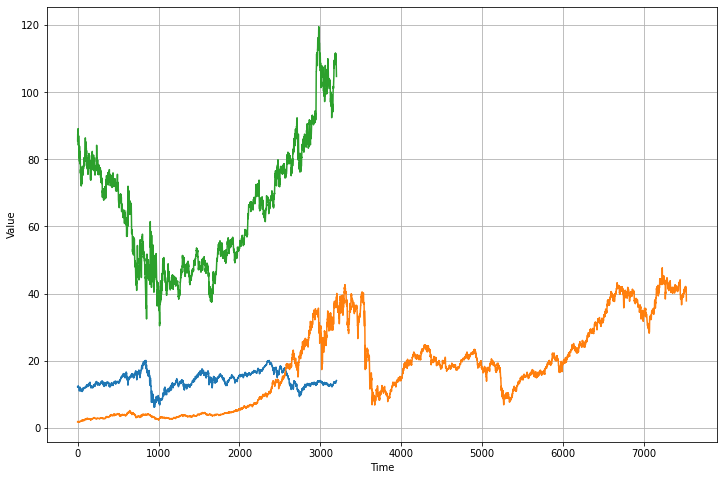

In [5]:
bgr = "/tmp/bgr.txt"
jci = "/tmp/jci.txt"
prk = "/tmp/prk.txt"
df_bgr = pd.read_csv(bgr, engine='python', header=0, sep=',')
df_jci = pd.read_csv(jci, engine='python', header=0, sep=',')
df_prk = pd.read_csv(prk, engine='python', header=0, sep=',')

df_brg_index = np.array(df_bgr.index)
df_bgr_open = np.array(df_bgr['Open'])

df_jci_index = np.array(df_jci.index)
df_jci_open = np.array(df_jci['Open'])

df_prk_index = np.array(df_prk.index)
df_prk_open = np.array(df_prk['Open'])

plt.figure(figsize=(12, 8))
plot_series(df_brg_index, df_bgr_open)
plot_series(df_jci_index, df_jci_open)
plot_series(df_prk_index, df_prk_open)

In [6]:
def mov_mean(lst, size):
  c_name = "MA_" + str(size)
  moving_mean = []
  for k in range(size):
    moving_mean.append(0)
  
  for i in range(len(lst['Close'])-size):
    mean = []
    for j in range(size+i, i, -1):
      mean.append(lst['Close'][j])
    moving_mean.append(round(sum(mean) / len(mean), 3))
  print(len(moving_mean))
  print(len(lst['Close']))
  return moving_mean
  


In [7]:
df_jci["MA_50"] = mov_mean(df_jci, 50)
df_jci["MA_10"]= mov_mean(df_jci, 10)
df_jci["MA_100"] = mov_mean(df_jci, 100)



7527
7527
7527
7527
7527
7527


In [8]:
df_jci = df_jci.drop(['OpenInt','Date'], axis=1)
jci_tomorrow = df_jci['Open'][1:].to_numpy()
jci_tomorrow = np.append(jci_tomorrow, 0)
jci_joined = df_jci.copy()


jci_joined['Tomorrow'] = jci_tomorrow

df_jci = df_jci.drop([7526])
df_jci.tail()
jci_joined.head()

,Open,High,Low,Close,Volume,MA_50,MA_10,MA_100,Tomorrow
0,1.7421,1.7935,1.7421,1.7935,210578,0.0,0.0,0.0,1.7808
1,1.7808,1.7808,1.7595,1.7808,203519,0.0,0.0,0.0,1.7765
2,1.7765,1.8236,1.7765,1.8022,252931,0.0,0.0,0.0,1.8236
3,1.8236,1.8836,1.8236,1.8449,531741,0.0,0.0,0.0,1.8962
4,1.8962,1.8962,1.8621,1.8836,826439,0.0,0.0,0.0,1.8621


In [9]:
df_jci.tail()

,Open,High,Low,Close,Volume,MA_50,MA_10,MA_100
7521,40.51,40.980,40.33,40.68,3561173,40.404,41.541,40.685
7522,40.84,41.350,40.73,41.09,3468374,40.454,41.489,40.681
7523,41.22,41.560,40.77,40.99,4198097,40.501,41.392,40.678
7524,40.88,41.175,40.68,41.00,3616533,40.551,41.372,40.667
7525,40.21,41.260,38.28,38.51,10586314,40.544,41.006,40.638


In [10]:
#jci_date = df_jci['Date']
#jci_open = df_jci['Open']
#df_jci = df_jci.drop(['OpenInt','Date'], axis=1) 
#print(len(jci_open))
split = round(len(jci_tomorrow)*0.75)



jci_num_data = df_jci.to_numpy()
jci_joined_num_data = jci_joined.to_numpy()

y_train = jci_tomorrow[:split]
x_train = jci_num_data[:split]

joined_x_train = jci_joined_num_data[:split]

y_valid = jci_tomorrow[split:]
x_valid = jci_num_data[split:]


print("Then length of x_train is : " + str(len(x_train)))
print("Then length of x_valid is : " + str(len(x_valid)))
print("Then length of joined_x_train is : " + str(len(joined_x_train)))

print("Then length of y_valid is : " + str(len(y_valid)))
print("Then length of y_train is : " + str(len(y_train)))





Then length of x_train is : 5645
Then length of x_valid is : 1881
Then length of joined_x_train is : 5645
Then length of y_valid is : 1882
Then length of y_train is : 5645


In [11]:

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    #series = tf.convert_to_tensor(series, dtype=tf.float32)
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

train_set = windowed_dataset(joined_x_train, 30, 100, 1000)
#joined_x_train.tolist()

In [31]:
tf.keras.backend.clear_session()
"""i = 0
for x,y in train_set:
  if i < 3:
    print("x = : " + str(x))
    print("y = : " + str(y))
    i = i +1"""
print(train_set)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1,
                      activation="relu",
                      input_shape=[None, 9, 1]),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
model.summary()
history = model.fit(train_set, epochs=10, callbacks=[lr_schedule])

<PrefetchDataset shapes: ((None, None, 9, 1), (None, None, 9, 1)), types: (tf.float64, tf.float64)>
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 5, 32)       192       
_________________________________________________________________
dense (Dense)                (None, None, 5, 30)       990       
_________________________________________________________________
dense_1 (Dense)              (None, None, 5, 10)       310       
_________________________________________________________________
dense_2 (Dense)              (None, None, 5, 1)        11        
Total params: 1,503
Trainable params: 1,503
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


ValueError: ignored